<a href="https://colab.research.google.com/github/maretuse/Dipa-Dwi-Atmadja_05TPLP004/blob/main/KNN_Breast_Cancer_(Kanker_Payudara)_114c4e.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
from google.colab import files
uploaded = files.upload()

print('Data source import complete.')


Saving gbsg.csv to gbsg.csv
Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os


In [3]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['gbsg.csv']))
print(df)

     Unnamed: 0   pid  age  meno  size  grade  nodes   pgr    er  hormon  \
0             1   132   49     0    18      2      2     0     0       0   
1             2  1575   55     1    20      3     16     0     0       0   
2             3  1140   56     1    40      3      3     0     0       0   
3             4   769   45     0    25      3      1     0     4       0   
4             5   130   65     1    30      2      5     0    36       1   
..          ...   ...  ...   ...   ...    ...    ...   ...   ...     ...   
681         682   586   51     0    30      3      2  1152    38       1   
682         683  1273   64     1    26      2      2  1356  1144       1   
683         684  1525   57     1    35      3      1  1490   209       1   
684         685   736   44     0    21      2      3  1600    70       0   
685         686   894   80     1     7      2      7  2380   972       1   

     rfstime  status  
0       1838       0  
1        403       1  
2       1603      

In [4]:
df

,Unnamed: 0,pid,age,meno,size,grade,nodes,pgr,er,hormon,rfstime,status
0,1,132,49,0,18,2,2,0,0,0,1838,0
1,2,1575,55,1,20,3,16,0,0,0,403,1
2,3,1140,56,1,40,3,3,0,0,0,1603,0
3,4,769,45,0,25,3,1,0,4,0,177,0
4,5,130,65,1,30,2,5,0,36,1,1855,0
...,...,...,...,...,...,...,...,...,...,...,...,...
681,682,586,51,0,30,3,2,1152,38,1,1760,0
682,683,1273,64,1,26,2,2,1356,1144,1,1152,0
683,684,1525,57,1,35,3,1,1490,209,1,1342,0
684,685,736,44,0,21,2,3,1600,70,0,629,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686 entries, 0 to 685
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  686 non-null    int64
 1   pid         686 non-null    int64
 2   age         686 non-null    int64
 3   meno        686 non-null    int64
 4   size        686 non-null    int64
 5   grade       686 non-null    int64
 6   nodes       686 non-null    int64
 7   pgr         686 non-null    int64
 8   er          686 non-null    int64
 9   hormon      686 non-null    int64
 10  rfstime     686 non-null    int64
 11  status      686 non-null    int64
dtypes: int64(12)
memory usage: 64.4 KB


In [6]:
df = df.drop("Unnamed: 0", axis=1)

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()

In [9]:
scaler.fit(df.drop('status',axis=1))

StandardScaler()

In [10]:
scaled_features = scaler.transform(df.drop('status',axis=1))

In [11]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,pid,age,meno,size,grade,nodes,pgr,er,hormon,rfstime
0,-1.684479,-0.400705,-1.168553,-0.793057,-0.200243,-0.550162,-0.544037,-0.629213,-0.747724,1.110827
1,1.229819,0.192569,0.855759,-0.653058,1.516840,2.008556,-0.544037,-0.629213,-0.747724,-1.123250
2,0.351289,0.291448,0.855759,0.746935,1.516840,-0.367396,-0.544037,-0.629213,-0.747724,0.744968
3,-0.397987,-0.796222,-1.168553,-0.303060,1.516840,-0.732927,-0.544037,-0.603064,-0.747724,-1.475098
4,-1.688518,1.181360,0.855759,0.046939,-0.200243,-0.001865,-0.544037,-0.393876,1.337392,1.137294


In [12]:
df_feat.describe()

,pid,age,meno,size,grade,nodes,pgr,er,hormon,rfstime
count,6.860000e+02,6.860000e+02,6.860000e+02,6.860000e+02,6.860000e+02,6.860000e+02,6.860000e+02,6.860000e+02,6.860000e+02,6.860000e+02
mean,1.683137e-17,1.760820e-16,-1.165249e-16,7.768324e-17,8.286213e-17,-8.286213e-17,-4.143106e-17,4.143106e-17,5.049411e-17,1.864398e-16
std,1.000730e+00,1.000730e+00,1.000730e+00,1.000730e+00,1.000730e+00,1.000730e+00,1.000730e+00,1.000730e+00,1.000730e+00,1.000730e+00
min,-1.949048e+00,-3.169320e+00,-1.168553e+00,-1.843051e+00,-1.917326e+00,-7.329271e-01,-5.440372e-01,-6.292130e-01,-7.477238e-01,-1.738205e+00
25%,-7.781786e-01,-6.973428e-01,-1.168553e+00,-6.530576e-01,-2.002429e-01,-7.329271e-01,-5.094153e-01,-5.769160e-01,-7.477238e-01,-8.667595e-01
50%,9.984707e-02,-5.188991e-03,8.557589e-01,-3.030596e-01,-2.002429e-01,-3.673960e-01,-3.832925e-01,-3.938763e-01,-7.477238e-01,-6.303648e-02
75%,7.562205e-01,7.858439e-01,8.557589e-01,3.969366e-01,-2.002429e-01,3.636661e-01,1.075969e-01,1.160198e-01,1.337392e+00,8.722402e-01
max,1.722604e+00,2.664547e+00,8.557589e-01,6.346904e+00,1.516840e+00,8.405350e+00,1.122742e+01,6.849263e+00,1.337392e+00,2.389000e+00


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['status'],test_size=0.30)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=21)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=21)

In [15]:
pred = knn.predict(X_test)

In [16]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))

[[86 22]
 [41 57]]


In [17]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.68      0.80      0.73       108
           1       0.72      0.58      0.64        98

    accuracy                           0.69       206
   macro avg       0.70      0.69      0.69       206
weighted avg       0.70      0.69      0.69       206



In [18]:
error_rate = []

for i in range(1, 41):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))


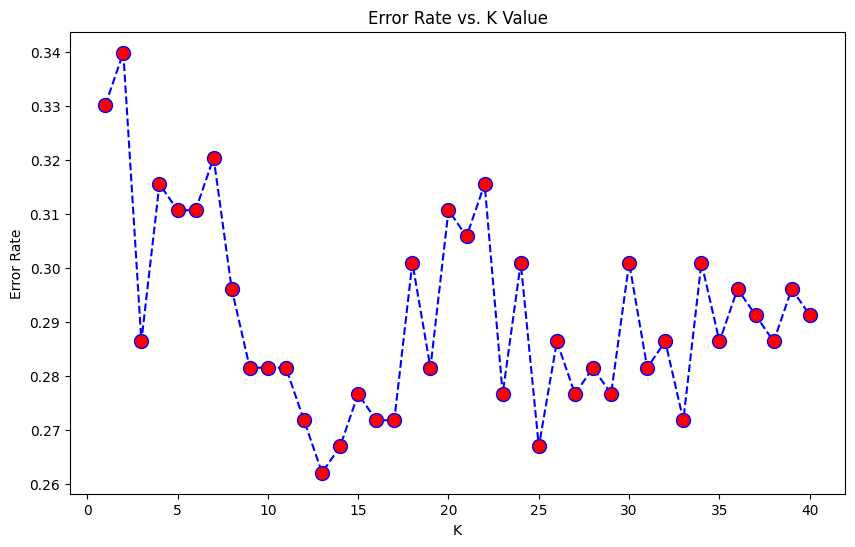

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, 41), error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
